# Reactor

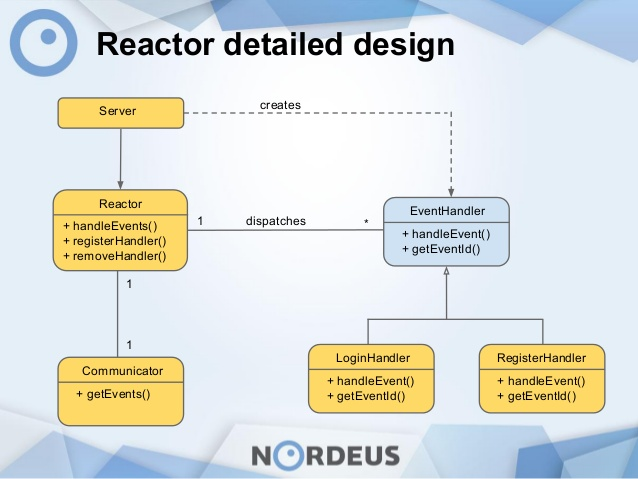

In [3]:
url='https://image.slidesharecdn.com/reactorpattern-conversationmeetup-141117082458-conversion-gate02/95/dejan-pekter-nordeus-reactor-design-pattern-18-638.jpg'

from IPython.display import Image
Image(url, width=600, height=500)

同時並行的にやってくるリクエストに対応するためのイベントハンドリングパターン。  
ハンドラーは入力されるリクエストをデマルチプレックス（多重化された複数の出力路から一つを選択して一つの入力路と接続すること）し、接続された後続のハンドラに渡していく。

## Structure

* Resources

    Any resource that can provide input to or consume output from the system.
    
* Synchronous Event Demultiplexer

    Uses an event loop to block on all resources. The demultiplexer sends the resource to the dispatcher when it is possible to start a synchronous operation on a resource without blocking (Example: a synchronous call to read() will block if there is no data to read. The demultiplexer uses select() on the resource, which blocks until the resource is available for reading. In this case, a synchronous call to read() won't block, and the demultiplexer can send the resource to the dispatcher.)
    
* Dispatcher

    Handles registering and unregistering of request handlers. Dispatches resources from the demultiplexer to the associated request handler.
    
* Request Handler

    An application defined request handler and its associated resource.

## Properties

All reactor systems are single threaded by definition, but can exist in a multithreaded environment.
Benefits

The reactor pattern completely separates application specific code from the reactor implementation, which means that application components can be divided into modular, reusable parts. Also, due to the synchronous calling of request handlers, the reactor pattern allows for simple coarse-grain concurrency while not adding the complexity of multiple threads to the system.
Limitations

The reactor pattern can be more difficult to debug[2] than a procedural pattern due to the inverted flow of control. Also, by only calling request handlers synchronously, the reactor pattern limits maximum concurrency, especially on Symmetric multiprocessing hardware. The scalability of the reactor pattern is limited not only by calling request handlers synchronously, but also by the demultiplexer.[3] 

In [14]:
class Countdown(object):

    counter = 5

    def count(self):
        if self.counter == 0:
            reactor.stop()
        else:
            print(self.counter, '...')
            self.counter -= 1
            reactor.callLater(1, self.count)

from twisted.internet import reactor

reactor.callWhenRunning(Countdown().count)

print('Start!')
reactor.run()
print('Stop!')

Start!


ReactorNotRestartable: 